In [1]:
#import required libraries
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 9.0
from pandas_profiling import ProfileReport

In [2]:
loan_data = pd.read_csv('loan.csv',encoding = "unicode_escape", low_memory=False)

uncomment the following to view the preliminary eda by pandas profiling

In [3]:
#loan_data_profile = ProfileReport(loan_data, title='Companies Report')

In [4]:
#loan_data_profile.to_widgets()

### Looking at warnings in the overview tab, there are a lot of columns with 100% missing data (LOL)
##### Lets drop them

In [5]:
len(loan_data)

39717

In [6]:
data=loan_data.isnull().sum()
data=data[data==39717]
print(len(data))

54


In [7]:
loan_data=loan_data.drop(data.index,axis=1)

In [8]:
loan_data.isnull().sum()*100/39717

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     6.19
emp_length                    2.71
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
desc                         32.58
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
mths_since_last_deli

There are 3 more columns that have a lot of missing data (mths_since_last_delinq ,mths_since_last_record,next_pymnt_d)

In [9]:
loan_data=loan_data.drop(['mths_since_last_delinq' ,'mths_since_last_record','next_pymnt_d'],axis=1)

##### desc (loan description by the borrower) has 32% missing values and does not affect univariate and bivariate analysis
##### This will be dropped (although NLP could be used on these to find out correlations) 

In [10]:
loan_data=loan_data.drop(['desc'],axis=1)

### In the same warnings section it can be seen that

pymnt_plan  
initial_list_status  
policy_code  application_type  
acc_now_delinq  
delinq_amnt  
have constant value in all rows  
##### So these will be dropped as well

In [11]:
loan_data=loan_data.drop(['pymnt_plan',
'initial_list_status',
'policy_code',
'application_type',
'acc_now_delinq',
'delinq_amnt'],axis=1)

Lets create the profile charts again

In [12]:
#new_loan_data_profile=ProfileReport(loan_data, title='Companies Report')

In [13]:
#new_loan_data_profile.to_widgets()

In the variables tab , we can see that the columns collections_12_mths_ex_med , chargeoff_within_12_mths, tax_liens are either 0 or missing

In [14]:
loan_data = loan_data.drop(['collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens'],axis=1)

id , member_id ,url,addr_state , zip_code have no relation to variable analysis as they just serve the purpose of identification of the individual

In [15]:
loan_data = loan_data.drop(['zip_code','url','member_id','id'],axis=1)

Some variables will not be accessible during loan application like collection_recovery_fee, revol_bal , revol_util , total_rec_late_fee , total_rec_prncp , total_rec_int , recoveries, last_pymnt_d, last_pymnt_amt, last_credit_pull_d, total_pymnt, total_pymnt_inv, out_prncp, out_prncp_inv

In [16]:
loan_data = loan_data.drop(['dti', 'collection_recovery_fee', 'revol_bal' , 'revol_util' , 'total_rec_late_fee' , 'total_rec_prncp' , 'total_rec_int' , 'recoveries', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'total_pymnt', 'total_pymnt_inv', 'out_prncp', 'out_prncp_inv'],axis=1)

In [17]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_title             37258 non-null  object 
 9   emp_length            38642 non-null  object 
 10  home_ownership        39717 non-null  object 
 11  annual_inc            39717 non-null  float64
 12  verification_status   39717 non-null  object 
 13  issue_d               39717 non-null  object 
 14  loan_status           39717 non-null  object 
 15  purpose            

Interest rate is shown as object type, lets see why

In [18]:
loan_data.int_rate

0        10.65%
1        15.27%
2        15.96%
3        13.49%
4        12.69%
          ...  
39712     8.07%
39713    10.28%
39714     8.07%
39715     7.43%
39716    13.75%
Name: int_rate, Length: 39717, dtype: object

lets convert it to float since interest rates are usually considered in percentages only

In [19]:
loan_data.int_rate=loan_data.int_rate.str.replace('%','')
loan_data.int_rate = pd.to_numeric(loan_data.int_rate, downcast="float")

In [20]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  float32
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_title             37258 non-null  object 
 9   emp_length            38642 non-null  object 
 10  home_ownership        39717 non-null  object 
 11  annual_inc            39717 non-null  float64
 12  verification_status   39717 non-null  object 
 13  issue_d               39717 non-null  object 
 14  loan_status           39717 non-null  object 
 15  purpose            

Lets check the title and purpose columns since they have similar descriptions

In [21]:
loan_data.purpose.unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [22]:
loan_data.title.unique()

array(['Computer', 'bike', 'real estate business', ...,
       'Retiring credit card debt', 'MBA Loan Consolidation', 'JAL Loan'],
      dtype=object)

Since purpose gives a better general idea , lets drop title

In [23]:
loan_data=loan_data.drop(['title'],axis=1)

Lets check the data for issue year and month 

In [24]:
loan_data.issue_d.unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Sep-07', 'Aug-07', 'Jul-07',
       'Jun-07'], dtype=object)

Lets split this into month and year

In [25]:
loan_data[['issue_m','issue_y']]=loan_data['issue_d'].str.split('-',expand=True)

Now that cleaning the data is done , lets move onto univariate analysis first

#### Univariate Analysis

In [26]:
loan_data.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

Keeping data that is only either paid or charged off

In [27]:
loan_data = loan_data[loan_data['loan_status'] != 'Current']

converting loan status to a binary integer variable

In [28]:
loan_data['loan_status'] = loan_data['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)
loan_data['loan_status'] = loan_data['loan_status'].apply(lambda x: pd.to_numeric(x))
loan_data['loan_status'].value_counts()

0    32950
1     5627
Name: loan_status, dtype: int64

Lets see the overall percentage of people charged off

In [29]:
len(loan_data[loan_data['loan_status'] == 1])/len(loan_data)

0.14586411592399617

Lets see the frequency in each grade

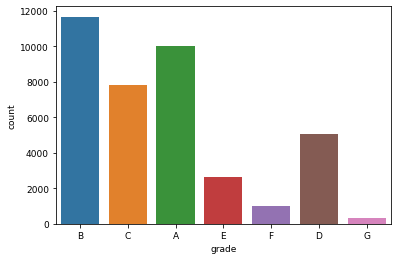

In [30]:
sns.countplot(x=loan_data['grade'])
plt.show()

More people are assigned grade A , B and C

Lets get an idea on loan amounts

In [31]:
loan_data.loan_amnt.describe()

count   38,577.00
mean    11,047.03
std      7,348.44
min        500.00
25%      5,300.00
50%      9,600.00
75%     15,000.00
max     35,000.00
Name: loan_amnt, dtype: float64

Lets see the quantity of loans issued over the years

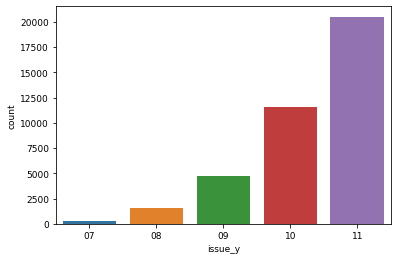

In [32]:
sns.countplot(x=loan_data['issue_y'])
plt.show()

The rate of giving loans has increased exponentially over the years

lets look at the work experience of applicants

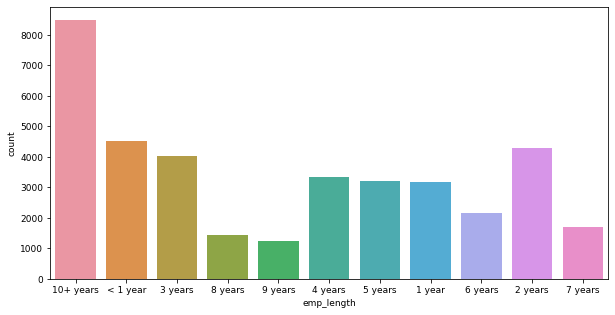

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(x=loan_data['emp_length'])
plt.show()

Higher applicants have more than 10 years work experience

### Lets perform some bivariate analysis

Lets see percentage on the basis of terms

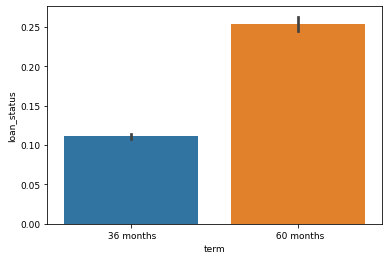

In [34]:
sns.barplot(x='term', y='loan_status', data=loan_data)
plt.show()

Long term loans are much likely to not get paid  
Lets check based on loan grade

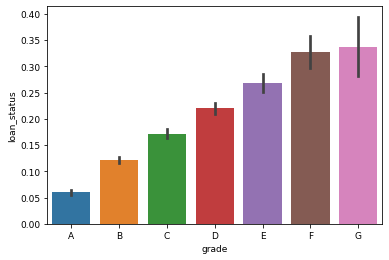

In [35]:
sns.barplot(x='grade', y='loan_status', data=loan_data, order=sorted(loan_data.grade.unique()))
plt.show()

Results are as expected for grade  
A,B,C are more likely to pay  
E,F,G are more likely to get charged off  
Lets check on sub grades too

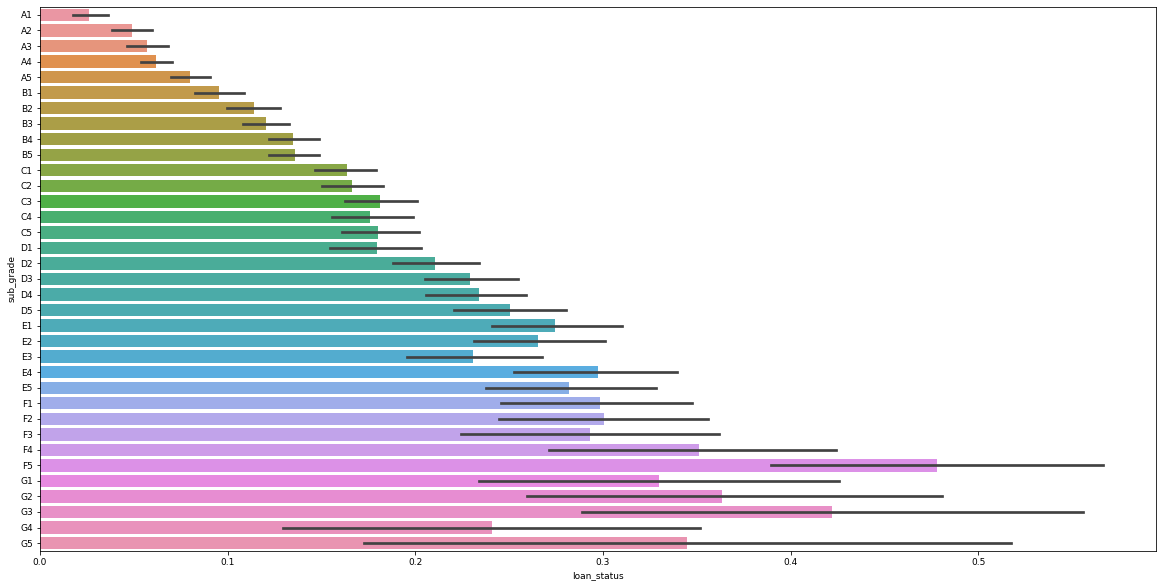

In [36]:
plt.figure(figsize=(20,10))
sns.barplot(x='loan_status', y='sub_grade', data=loan_data, order=sorted(loan_data.sub_grade.unique()))
plt.show()

Similar trend here as well

Lets see the loan status on the basis of number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years (delinq_2yrs)

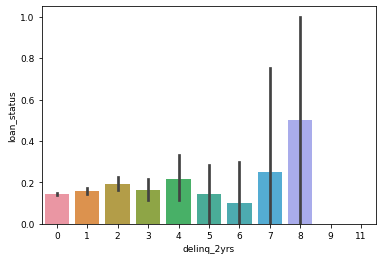

In [37]:
sns.barplot(x='delinq_2yrs', y='loan_status', data=loan_data)
plt.show()

There is a clear spike at 8 instances as expected and overall trend is generally increasing as expected with the exception of 4 - 6

Lets see charge off data on verification status 

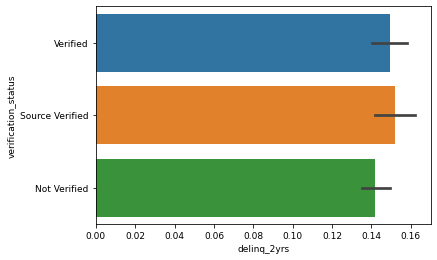

In [38]:
sns.barplot(x='delinq_2yrs', y='verification_status', data=loan_data)
plt.show()

Not as expected , one would think income verification would lead to less charge offs

Lets check on the basis of home status

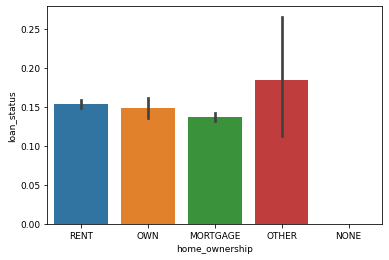

In [39]:
sns.barplot(x='home_ownership', y='loan_status', data=loan_data)
plt.show()

Nothing much can be concluded from this graph

Lets check on the basis of purpose

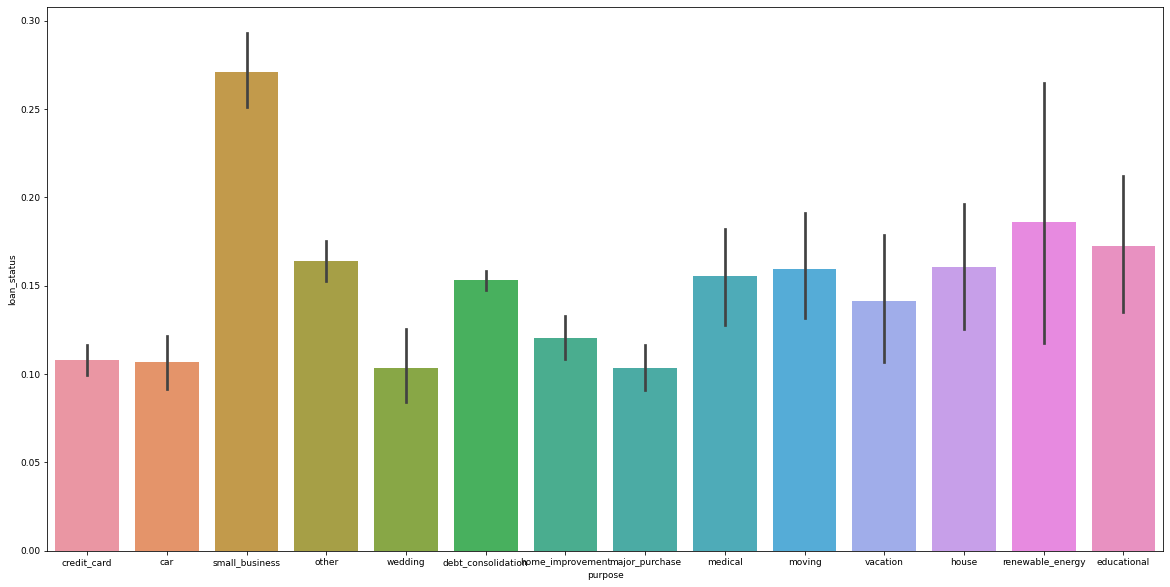

In [40]:
plt.figure(figsize=(20,10))
sns.barplot(x='purpose', y='loan_status', data=loan_data)
plt.show()

Small business have a higher tendency to be charged off

Lets check charge off rate on the basis of month and year the loan was issued

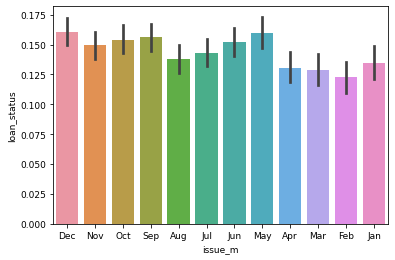

In [41]:
sns.barplot(x='issue_m', y='loan_status', data=loan_data)
plt.show()

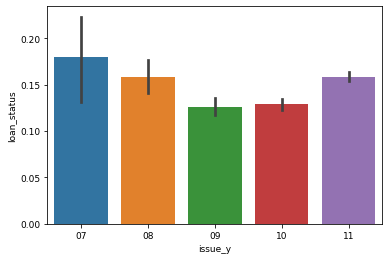

In [42]:
sns.barplot(x='issue_y', y='loan_status', data=loan_data)
plt.show()

Loans issued in Jan to April are more likely to be paid  
2007 was the year most charge offs occured (percentage wise)

Lets check charge off rates on the basis of states

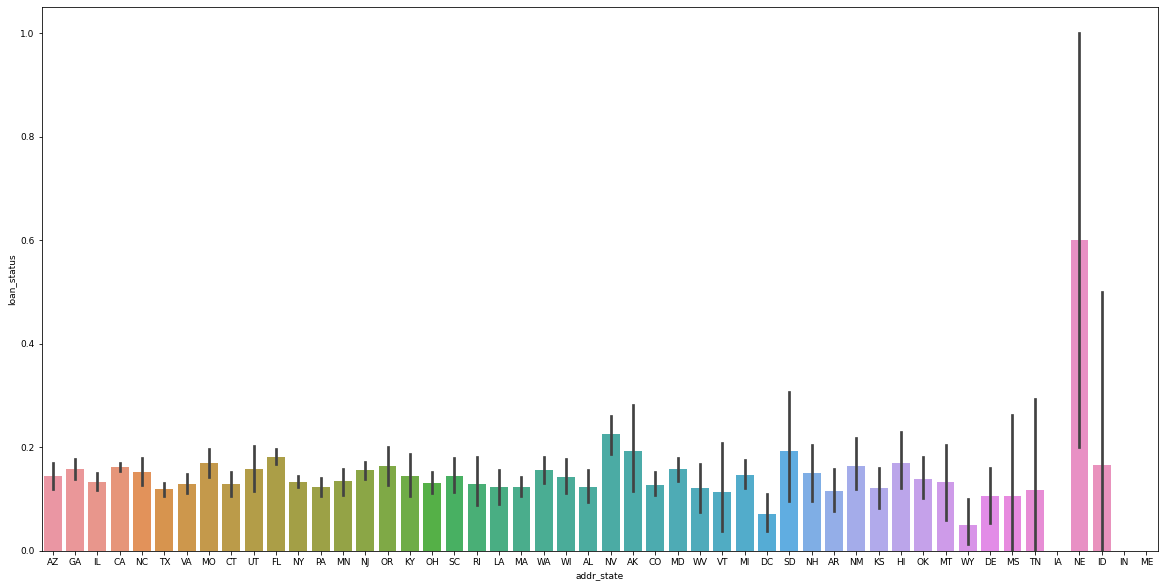

In [43]:
plt.figure(figsize=(20,10))
sns.barplot(x='addr_state', y='loan_status', data=loan_data)
plt.show()

There is a clear spike for the state NE

Lets check charge off rates on the basis of annual income

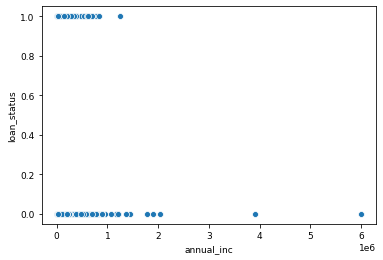

In [44]:
sns.scatterplot(x='annual_inc', y='loan_status', data=loan_data)
plt.show()

It seems people with annual income above 15 lakhs are sure to pay off the loan

### Lets perform some segmented analysis

First on the basis of loan amounts

In [45]:
loan_data.loan_amnt.describe()

count   38,577.00
mean    11,047.03
std      7,348.44
min        500.00
25%      5,300.00
50%      9,600.00
75%     15,000.00
max     35,000.00
Name: loan_amnt, dtype: float64

Lets divide the segments on the basis of 25,50,75% quartiles

In [46]:
loan_data['loan_cat']=loan_data['loan_amnt'].apply(lambda x: '1' if x<5300 else ('2' if x<9600 else ('3' if x<15000 else '4')))

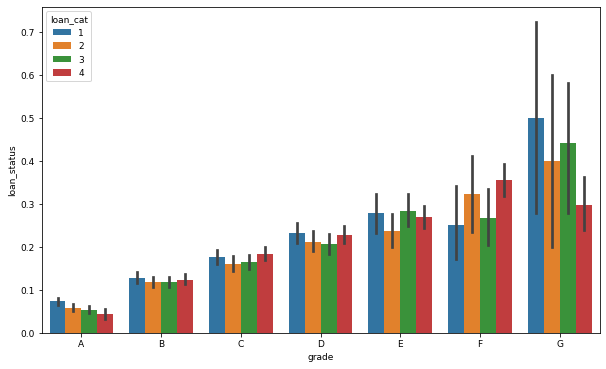

In [47]:
plt.figure(figsize=(10, 6))
sns.barplot(x='grade', y='loan_status', hue='loan_cat', data=loan_data,order=sorted(loan_data.grade.unique()))
plt.show()

With the exception of F , loans in the 25% quartile are more likely to get charged off

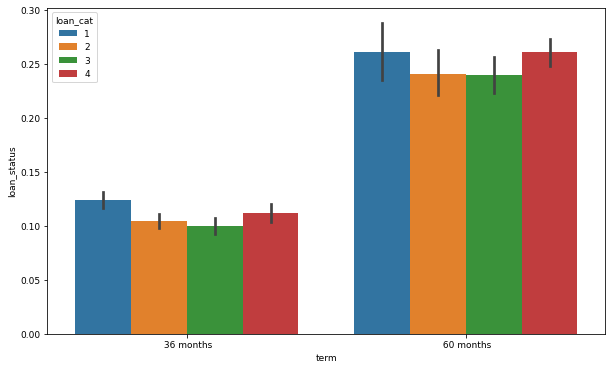

In [48]:
plt.figure(figsize=(10, 6))
sns.barplot(x='term', y='loan_status', hue='loan_cat', data=loan_data)
plt.show()

Same trends here

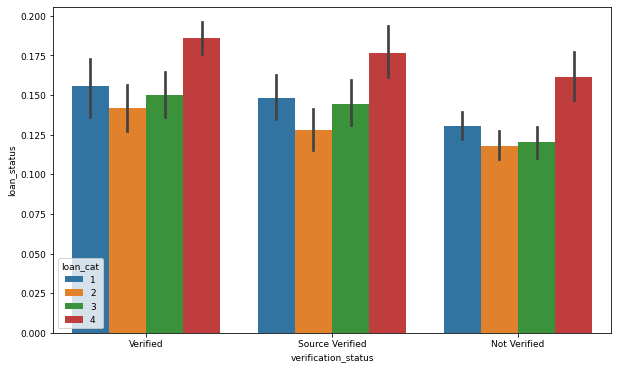

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(x='verification_status', y='loan_status', hue='loan_cat', data=loan_data)
plt.show()

In all statuses loan amounts above 75% quartile are more prone to get charged off

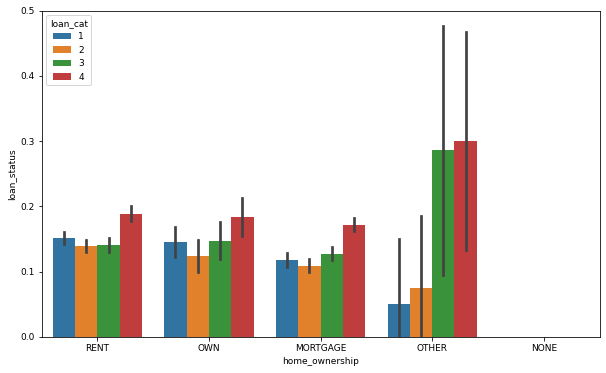

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(x='home_ownership', y='loan_status', hue='loan_cat', data=loan_data)
plt.show()

Same trend observed as above with a clear spike for applicants having other as home ownership and applying for loans above the 50% quantile

Lets check for purpose

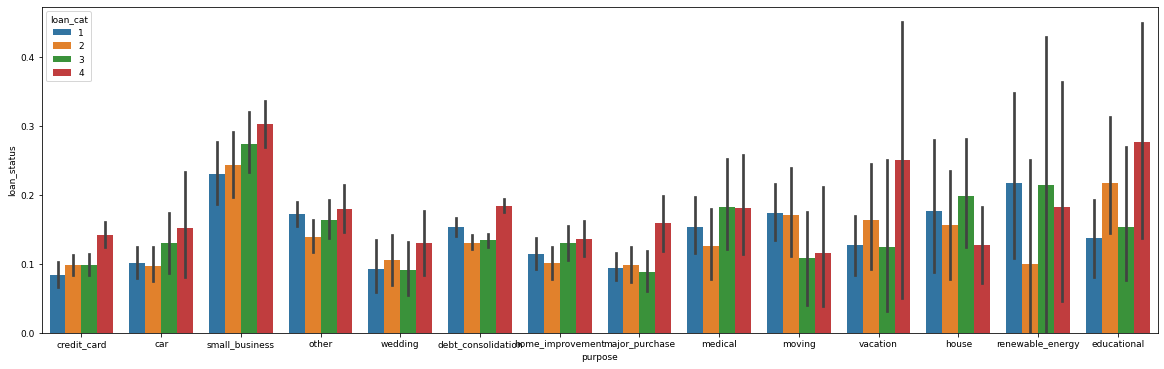

In [51]:
plt.figure(figsize=(20, 6))
sns.barplot(x='purpose', y='loan_status', hue='loan_cat', data=loan_data)
plt.show()

Here too the applicants above 75% quantile have a higher charge off rate in general

Since E,F,G have higher % of charge offs , their interest rates must be higher as well vice versa for A,B,C right?

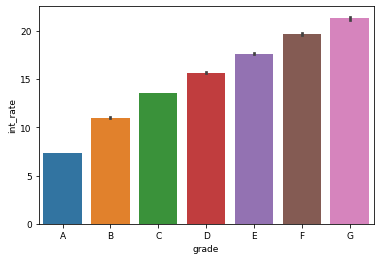

In [52]:
sns.barplot(x='grade', y='int_rate', data=loan_data, order=sorted(loan_data.grade.unique()))
plt.show()

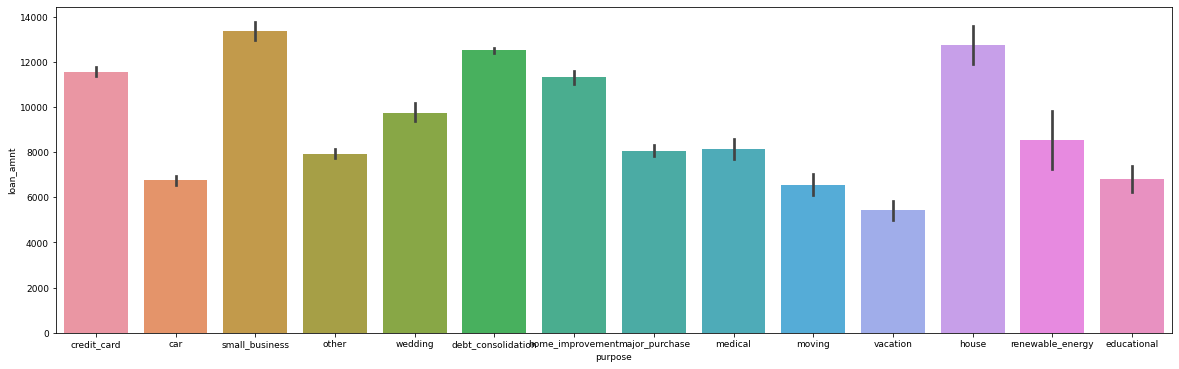

In [53]:
plt.figure(figsize=(20, 6))
sns.barplot(x='purpose', y='loan_amnt', data=loan_data)
plt.show()

Small businesses , house , credit card , debit_consolidation have highest amounts on average

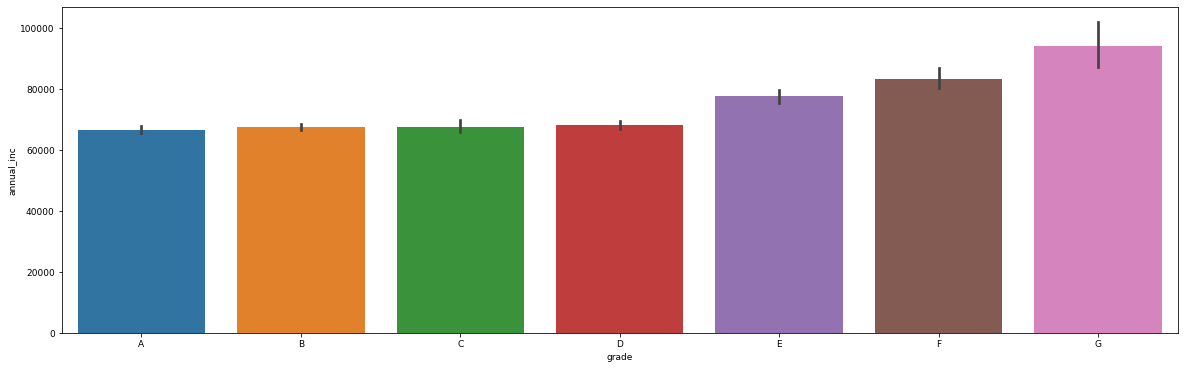

In [54]:
plt.figure(figsize=(20, 6))
sns.barplot(x='grade', y=loan_data['annual_inc'], data=loan_data,order=sorted(loan_data.grade.unique()))
plt.show()

This is interesting , people in G grade have higher average annual income than those of A,B,C  (although this is also possible due to different sizes of population) 